# Exercise 11, page 58
find the IDs and names of products that have sold more than the average number of
units.

In [9]:
import pandas as pd
from pandas import Series, DataFrame
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
df = pd.read_csv('products.csv', index_col=0)
df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.00,"1,000.00",100
1,96,Python Workout,35.00,75.00,1000
2,97,Pandas Workout,35.00,75.00,500
3,15,banana,0.50,1.00,200
4,87,sandwich,3.00,5.00,300
5,24,phone,200.00,500.00,100
6,16,apple,0.50,1.00,200
7,17,pear,0.60,1.20,75


In [11]:
df['sales'].mean()

309.375

In [12]:
df['sales'] > df['sales'].mean()

0    False
1     True
2     True
3    False
4    False
5    False
6    False
7    False
Name: sales, dtype: bool

In [13]:
df.loc[df['sales'] > df['sales'].mean()]

,product_id,name,wholesale_price,retail_price,sales
1,96,Python Workout,35.00,75.00,1000
2,97,Pandas Workout,35.00,75.00,500


In [16]:
df.loc[df['sales'] > df['sales'].mean(),['product_id', 'name']]

,product_id,name
1,96,Python Workout
2,97,Pandas Workout


In [18]:
df.query('sales > sales.mean()')[['product_id','name']]

,product_id,name
1,96,Python Workout
2,97,Pandas Workout


## Show the ID and name of products whose net income is in the top 25% quantile.

"Net income" apparently means "net price" per the provided solution.

See: https://en.wikipedia.org/wiki/Quantile

In [34]:
import pandas as pd
from pandas import Series, DataFrame

df = DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.00,1000,100
1,96,Python Workout,35.00,75,1000
2,97,Pandas Workout,35.00,75,500
3,15,banana,0.50,1,200
4,87,sandwich,3.00,5,300


In [35]:
df['net_price'] = df['retail_price'] - df['wholesale_price']
df['net_income'] = df['net_price'] * df['sales']
df

,product_id,name,wholesale_price,retail_price,sales,net_price,net_income
0,23,computer,500.00,1000,100,500.00,"50,000.00"
1,96,Python Workout,35.00,75,1000,40.00,"40,000.00"
2,97,Pandas Workout,35.00,75,500,40.00,"20,000.00"
3,15,banana,0.50,1,200,0.50,100.00
4,87,sandwich,3.00,5,300,2.00,600.00


In [36]:
df['net_price'].quantile(0.75)

40.0

In [38]:
df['net_price'].sort_values()

3     0.50
4     2.00
1    40.00
2    40.00
0   500.00
Name: net_price, dtype: float64

In [33]:
8 * .75

6.0

In [25]:
df.quantile(.25, numeric_only=True)

product_id         16.75
wholesale_price     0.57
retail_price        1.15
sales             100.00
net                 0.57
net_price           0.57
net_income        100.00
Name: 0.25, dtype: float64

In [21]:
df.describe()

,product_id,wholesale_price,retail_price,sales
count,8.00,8.00,8.00,8.00
mean,46.88,96.83,207.28,309.38
std,38.71,176.25,362.05,311.66
min,15.00,0.50,1.00,75.00
25%,16.75,0.57,1.15,100.00
50%,23.50,19.00,40.00,200.00
75%,89.25,76.25,181.25,350.00
max,97.00,500.00,"1,000.00","1,000.00"


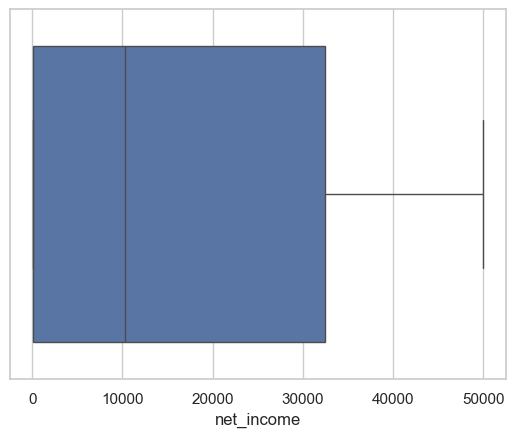

In [26]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df["net_income"])

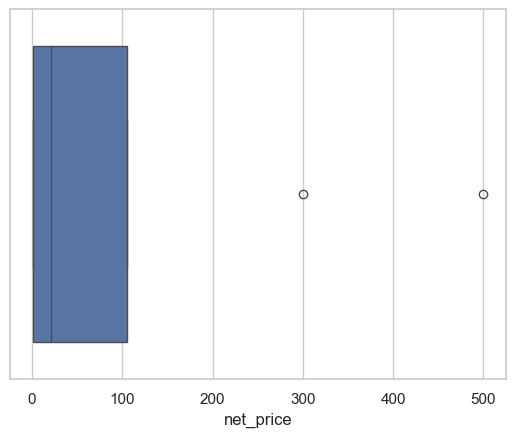

In [27]:
ax = sns.boxplot(x=df["net_price"])

In [28]:
df['net_income'].describe()

count        8.00
mean    17,605.62
std     20,426.59
min         45.00
25%        100.00
50%     10,300.00
75%     32,500.00
max     50,000.00
Name: net_income, dtype: float64

## Show the ID and name of products with lower-than-average sales numbers and whose wholesale price is greater than the average.

In [39]:
import pandas as pd
from pandas import Series, DataFrame

df = DataFrame([{'product_id':23, 'name':'computer', 'wholesale_price': 500,
                 'retail_price':1000, 'sales':100},
               {'product_id':96, 'name':'Python Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':1000},
               {'product_id':97, 'name':'Pandas Workout', 'wholesale_price': 35,
                'retail_price':75, 'sales':500},
               {'product_id':15, 'name':'banana', 'wholesale_price': 0.5,
                'retail_price':1, 'sales':200},
               {'product_id':87, 'name':'sandwich', 'wholesale_price': 3,
                'retail_price':5, 'sales':300},
               ])

df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.00,1000,100
1,96,Python Workout,35.00,75,1000
2,97,Pandas Workout,35.00,75,500
3,15,banana,0.50,1,200
4,87,sandwich,3.00,5,300


In [40]:
df['sales'] < df['sales'].mean()

0     True
1    False
2    False
3     True
4     True
Name: sales, dtype: bool

In [41]:
df['wholesale_price'] > df['wholesale_price'].mean()

0     True
1    False
2    False
3    False
4    False
Name: wholesale_price, dtype: bool

In [48]:
df.loc[
(df['sales'] < df['sales'].mean()) & 
(df['wholesale_price'] > df['wholesale_price'].mean()),['product_id','name']
]

,product_id,name
0,23,computer


In [47]:
df.loc[((df['sales'] < df['sales'].mean()) & (df['wholesale_price'] > df['wholesale_price'].mean()))][['product_id','name']]

,product_id,name
0,23,computer


In [51]:
df.query('sales < sales.mean() & wholesale_price > wholesale_price.mean()')[['product_id','name']]

,product_id,name
0,23,computer


## Show the name and wholesale and retail prices of products with IDs between 80 and 100 and that sold fewer than 400 units.

In [52]:
df

,product_id,name,wholesale_price,retail_price,sales
0,23,computer,500.00,1000,100
1,96,Python Workout,35.00,75,1000
2,97,Pandas Workout,35.00,75,500
3,15,banana,0.50,1,200
4,87,sandwich,3.00,5,300


In [59]:
df.loc[(df['product_id'] >= 80) & (df['product_id'] <= 100) & (df['sales'] < 400), ['name','wholesale_price','retail_price']]

,name,wholesale_price,retail_price
4,sandwich,3.00,5
